# IPL Match Result Analysis & Prediction using ML

In [3]:
##importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
##loading the csv files into dataframe
match_df = pd.read_csv("Data/matchest20-1.csv")
match_df.sample(10)

,season,Match_date,city,team1,team2,winner,toss_winner,toss_decision,win_by_runs,win_by_wickets
567,2017,2017/03/12,Greater Noida,Afghanistan,Ireland,Afghanistan,Ireland,field,28,NaN
89,2009,2009/06/10,Nottingham,India,Ireland,India,India,field,NaN,8
444,2015,2015/11/30,Abu Dhabi,Afghanistan,Oman,Afghanistan,Oman,field,12,NaN
381,2014,2014/10/05,Dubai (DSC),Australia,Pakistan,Australia,Pakistan,bat,NaN,6
542,2017,2017/01/06,Mount Maunganui,New Zealand,Bangladesh,New Zealand,Bangladesh,field,47,NaN
204,2012,2012/02/14,Hamilton,New Zealand,Zimbabwe,New Zealand,Zimbabwe,bat,NaN,5
316,2013,2013/11/20,Johannesburg,South Africa,Pakistan,South Africa,Pakistan,field,4,NaN
772,2019,2019/10/23,ICCA 2 Dubai,Bermuda,Namibia,Namibia,Namibia,field,NaN,6
789,2019,2019/10/31,ICCA Dubai,Oman,Scotland,Scotland,Scotland,bat,NaN,5
674,2018,2018/11/25,Sydney,Australia,India,India,Australia,bat,NaN,6


## Exploratory Data Analysis

* Looking at all the teams in the teams and winners' column
* Checking for missing values for the no result matches
* Encoding Team Names
* Visualizing the toss wins and match wins by each team


### Looking at all the teams in the teams and winners' column

In [5]:
match_df['winner'].value_counts()

Pakistan          91
India             87
South Africa      73
New Zealand       64
Sri Lanka         63
England           60
Australia         58
West Indies       55
Afghanistan       50
Netherlands       43
Ireland           38
Scotland          34
Bangladesh        29
Zimbabwe          21
Kenya             14
Namibia           11
Hong Kong          8
P.N.G.             7
U.A.E.             7
Canada             6
Singapore          4
Nepal              3
Oman               2
Cayman Islands     2
World-XI           1
Bermuda            1
U.S.A.             1
Name: winner, dtype: int64

In [6]:
match_df['team1'].value_counts()

Australia       81
New Zealand     80
South Africa    69
India           68
Afghanistan     66
England         63
Bangladesh      57
Ireland         48
Sri Lanka       47
West Indies     41
Pakistan        41
Netherlands     36
Zimbabwe        27
Kenya           21
Canada          14
U.A.E.          14
Bermuda         12
Namibia         10
Hong Kong       10
Scotland        10
Oman             7
Nepal            3
Ghana            2
Uganda           2
Singapore        2
Botswana         1
P.N.G.           1
Name: team1, dtype: int64

In [7]:
match_df[match_df['winner'].isnull() == True]


,season,Match_date,city,team1,team2,winner,toss_winner,toss_decision,win_by_runs,win_by_wickets


In [8]:
##replacing null results with draw
match_df['winner'].fillna('Draw', inplace=True)

In [9]:
match_df[match_df['winner'].isnull() == True]

,season,Match_date,city,team1,team2,winner,toss_winner,toss_decision,win_by_runs,win_by_wickets


### Encoding Team Names 

In [37]:

team_encodings = {
    'India' : 1,
    'New Zealand' :2,
    'Sri Lanka' :3,
    'Pakistan' :4,
    'England':5,
    'Australia' :6,
    'Bangladesh' :7,
    'South Africa' :8,
    'West Indies' :9,
    'Zimbabwe' :10,
    'Ireland' :11,
    'Afghanistan' :12,
    'Kenya' :13,
    'Scotland' :14,
    'Netherlands' :15,
    'Ireland' :16,
    'Bermuda' :17,
    'Namibia' :18,
    'Canada' :19,
    'U.A.E.' :20,
    'Hong Kong' :21,
    'Nepal' :22,
    'P.N.G.' :23,
    'Oman' :24,
    'World-XI' :25,
    'Namibia' :26,
    'Nigeria' :27,
    'U.S.A.' :28,
    'Botswana' :29,
    'Cayman Islands' :30,
    'Singapore' :31,
    'Jersey' :32,
    'Ghana':33,
    'Uganda':34

    
}

team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'winner': team_encodings
                   }

match_df.replace(team_encode_dict, inplace=True)
match_df.head()

,team1,team2,city,toss_decision,toss_winner,winner
0,2,6,6,0,6,6
1,5,6,96,0,5,5
2,8,2,54,0,2,2
3,6,8,14,0,6,6
4,8,6,54,0,8,8


### Exploring City Column

In [38]:
match_df['city'].value_counts()

35    59
33    43
27    36
54    29
1     28
      ..
59     1
42     1
3      1
36     1
97     1
Name: city, Length: 109, dtype: int64

### Dropping all the redundant columns

In [39]:
match_df = match_df[[ 'team1','team2','city','toss_decision','toss_winner','winner']]
match_df.head()

,team1,team2,city,toss_decision,toss_winner,winner
0,2,6,6,0,6,6
1,5,6,96,0,5,5
2,8,2,54,0,2,2
3,6,8,14,0,6,6
4,8,6,54,0,8,8


In [40]:
match_df.describe()

,team1,team2,city,toss_decision,toss_winner,winner
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,8.570228,8.757503,47.306122,0.447779,8.809124,7.990396
std,6.198261,6.597914,30.072767,0.497564,6.405625,6.067521
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,4.000000,4.000000,24.000000,0.000000,4.000000,3.000000
50%,7.000000,7.000000,43.000000,0.000000,7.000000,6.000000
75%,12.000000,13.000000,70.000000,1.000000,13.000000,12.000000
max,34.000000,32.000000,108.000000,1.000000,33.000000,31.000000


### Toss Wins and Match Wins by each Team

In [41]:
##looking at number of toss wins and match wins
toss_wins = match_df['winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

for idx, val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]} -> {toss_wins[idx]}")


Pakistan -> 91
India -> 87
South Africa -> 73
New Zealand -> 64
Sri Lanka -> 63
England -> 60
Australia -> 58
West Indies -> 55
Afghanistan -> 50
Netherlands -> 43
Bermuda -> 38
Scotland -> 34
Bangladesh -> 29
Zimbabwe -> 21
Kenya -> 14
U.S.A. -> 11
Nepal -> 8
Oman -> 7
Hong Kong -> 7
U.A.E. -> 6
Ghana -> 4
P.N.G. -> 3
World-XI -> 2
Jersey -> 2
Nigeria -> 1
Namibia -> 1
Cayman Islands -> 1


### Plotting Wins by each team on a Histogram

<AxesSubplot:>

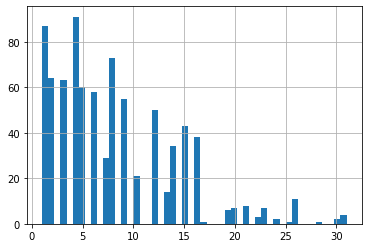

In [15]:
match_df['winner'].hist(bins=50)

In [ ]:
match_df['winner'].value_counts()

1     109
5     100
2      92
3      84
9      82
6      75
7      67
10     58
4      29
11     15
8      13
13     12
14     10
12      6
15      4
Name: winner, dtype: int64

Text(0.5, 1.0, 'Match winners')

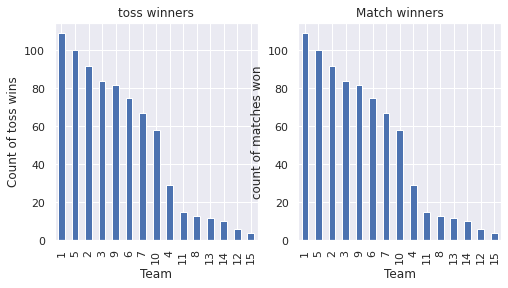

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [ ]:
match_df.isnull().sum()

id               0
team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

## Data Preparation

**Encoding all the remaining features**

* city
* toss_decision
* venue

In [42]:
##using the label encoder
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city', 'toss_decision']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)

match_df

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108]
[0 1]


,team1,team2,city,toss_decision,toss_winner,winner
0,2,6,6,0,6,6
1,5,6,96,0,5,5
2,8,2,54,0,2,2
3,6,8,14,0,6,6
4,8,6,54,0,8,8
...,...,...,...,...,...,...
828,12,16,43,0,16,16
829,3,9,82,1,9,9
830,12,16,43,0,12,12
831,7,10,33,0,10,10


## Machine Learning

In [43]:
##splitting the data for training and testing

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df, test_size=0.2, random_state=42)
print(train_df.shape)
print(test_df.shape)

(666, 6)
(167, 6)


In [44]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def print_model_scores(model, data, predictors, target):
    '''
    A generic function to generate the performance report of the
    model in question on the data passed to it using cross-validation
    
    Args:
        model: ML Model to be checked
        data: data on which the model needs to pe trained
        predictors: independent feature variable
        target: target variable
    '''
    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    accuracy = accuracy_score(predictions,data[target])
    print('Accuracy : %s' % '{0:.2%}'.format(accuracy))
    scores = cross_val_score(model, data[predictors], data[target], scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
    print(f"Average RMSE: {np.sqrt(-scores).mean()}")

### Logistic Regression

In [45]:
##PAVITHRANI:WE WILL BE USING THE RANDOM FORREST ONE COZ OF HIGHER ACCURACY
target_var=['winner']
predictor_var = ['team1','team2', 'toss_winner', 'city', 'toss_decision']
model = LogisticRegression()
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy : 24.17%
Cross-Validation Score :[6.04522755 5.18021104 5.54679342 5.2041048  5.03372088]
Average RMSE: 5.40201153889536


### Random Forest Classifier

In [47]:
model1 = RandomForestClassifier(n_estimators=100)
target_var = ['winner']
predictor_var = ['team1', 'team2', 'toss_winner','city','toss_decision']
print_model_scores(model1, match_df,predictor_var, target_var)

Accuracy : 94.60%
Cross-Validation Score :[3.31933187 3.52663093 3.28396576 3.40711516 3.40711516]
Average RMSE: 3.388831779186033


### Sample Prediction

In [50]:
team1='India'
team2='Pakistan'
toss_winner='Pakistan'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],team_encode_dict['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model1.predict(inp)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[['1' '4' '4' '2' '1']]
The winner would be: India


In [51]:
import pickle 
pickle.dump(model1,open('model.pkl','wb'))